# Project : Collecting Data from Twitter and analyzing it

<img src="https://logos-download.com/wp-content/uploads/2016/02/Twitter_Logo_new-700x569.png">

**Suggested Readings:** 
* Chapter 1 and Chapter 9 of the book "Mining the Social Web" can help a lot if you get stuck. 
* In fact, the Twitter tutorial can help you with many problems in this project.

**Don't forget!**
* You will need to install the twitter library to access the Twitter API
 * pip install twitter

# Sampling Twitter Data with the Search API about a certain topic

In [ ]:
! pip install twitter

In [1]:
import twitter
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # See https://developer.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'iSup9jCLJ9IWN7YwXBQBiv07M' # my developer twitter API key
    CONSUMER_SECRET ='p8uCq4VGTD00LrWGeLEYVd9sz59caJEtmzY6ppsSaBcbx1P6xf' # my twitter API Key Secret 
    OAUTH_TOKEN = '1420264351-z2jXoURtanZG09HIZL7oQdEIvmJtJ2ktGVvVcAM' # My twitter access token
    OAUTH_TOKEN_SECRET = '3LTU1djibdAVjUwJeQFAHlurpLAzClEGT09hjdzR9hVYL' # My twitter access token sercet key
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api


In [3]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import json
q= "MCIMUN" # Topic hashtag

c = 100 # search count

# Authenticating using the oauth_login() function defined above 
twitter_api = oauth_login()

print(twitter_api) # printing the authentication result
search_results = twitter_api.search.tweets(q=q, count=c) # Returns a Dictionary with 2 key-values, one is statuses and another key is search_metadata


statuses = search_results['statuses'] # Gives a list of dictionaries with each dictionary contains a tweet info

# Iterating through 5 more batches of results by following the cursor
#print(statuses)
for _ in range(5):
    #print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
        #print(next_results)
    except KeyError: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    #print(kwargs)
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# storing the statuses data to a .json local file    
storeStatusFileObject = open("sampleDataStatus.json", "w")    
json.dump(statuses,storeStatusFileObject, indent = 4)
storeStatusFileObject.close()


# storing the search_results data to a .json local file
storeFileObject = open("sampleDataSearchResultsAfter.json", "w")
json.dump(search_results,storeFileObject, indent = 4)
storeFileObject.close()

print("\nThe no of tweets collected are : " + str(len(statuses)))



The no of tweets collected are : 599


#  Analyzing Tweets and Tweet Entities with Frequency Analysis


In [5]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

from collections import Counter  # importing counter functions for word count
from prettytable import PrettyTable # importing PrettyTable functions for displaying the output in standard format

wordsLi = [] # empty list to store all the words  as list
print("\n The total number of tweets : " + str(len(statuses)))
for i in statuses:
    a = i["text"].split()  # taking the text from each tweet
    wordsLi = wordsLi + a
    
print("\n The total words: " + str(len(wordsLi)))
#print(wordsLi)

c = Counter(wordsLi) # returns a list with tuples containing word and the count for the word

#print(c.most_common()[:30]) #Printing the top 30

pt = PrettyTable(field_names=['Word', 'Count']) 

[ pt.add_row(kv) for kv in c.most_common()[:30] ]
pt.align['Word'], pt.align['Count'] = 'l', 'r' # Set column alignment
print(pt) #Printing the top 30


 The total number of tweets : 599

 The total words: 9767
+------------+-------+
| Word       | Count |
+------------+-------+
| RT         |   469 |
| #MCIMUN    |   338 |
| the        |   174 |
| #MUFC      |   125 |
| ,          |   116 |
| ||         |    95 |
| @ManUtd:   |    91 |
| for        |    90 |
| and        |    88 |
| in         |    80 |
| to         |    78 |
| I          |    72 |
| a          |    68 |
| Manchester |    58 |
| Man        |    56 |
| City       |    50 |
| Haaland    |    49 |
| is         |    48 |
| on         |    46 |
| of         |    46 |
| as         |    41 |
| fans       |    38 |
| an         |    35 |
| like       |    33 |
| The        |    32 |
| United     |    32 |
| A          |    32 |
| Ronaldo    |    31 |
| was        |    30 |
| back       |    30 |
+------------+-------+


* the most popular tweets in your collection of tweets**

In [6]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Creating a list of retweets with the retweet count and user name 
retweets = [
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            for status in statuses 
            
                if 'retweeted_status'in status
           ]

print("\n The 10 tweets that are the most popular among the collection \n ")
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 100
pt.align= 'l'
print(pt)


 The 10 tweets that are the most popular among the collection 
 
+-------+---------------+------------------------------------------------------------------------------------------------------+
| Count | Screen Name   | Text                                                                                                 |
+-------+---------------+------------------------------------------------------------------------------------------------------+
| 8133  | ManUtd        | RT @ManUtd: 🥊 In the red corner...                                                                  |
|       |               |                                                                                                      |
|       |               | #MUFC || #MCIMUN                                                                                     |
| 7033  | premierleague | RT @premierleague: The first player in #PL history to score a hat-trick in three successive home     |
|       |               | matche

* The most popular Tweet Entities in your collection of tweets**

In [7]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

from prettytable import PrettyTable

# Extracting the screen name from the collected statuses data
screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

# Extracting the hashtags from the collected statuses data
hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

print("\n The top 10 hashtags, top 10 user mentions that are the most popular among the collection: \n ")

for label, data in (('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Setting the column alignment
    print(pt)


 The top 10 hashtags, top 10 user mentions that are the most popular among the collection: 
 
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| ManUtd          |    98 |
| ManCity         |    33 |
| premierleague   |    29 |
| Citizen_Maine   |    24 |
| city_rabin      |    23 |
| mcfcfeed        |    23 |
| PLforIndia      |    17 |
| CFCSammy___     |    15 |
| kollybreezy     |    14 |
| Lebonmaillotoff |    13 |
+-----------------+-------+
+-----------------+-------+
| Hashtag         | Count |
+-----------------+-------+
| MCIMUN          |   343 |
| MUFC            |   126 |
| cotedivoire     |    30 |
| CIV225          |    30 |
| Coolio          |    30 |
| NFTs            |    30 |
| PL              |    24 |
| mancity         |    24 |
| ManchesterDerby |    20 |
| Haaland         |    20 |
+-----------------+-------+




#  Getting "All" friends and "All" followers of a popular user in twitter


* list of all friends and all followers of the twitter user.**

In [38]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

tUserName = "akhil pragallapati" # Mention the screen name of the user 
friendsQuery = twitter_api.friends.ids(screen_name = tUserName) # fetching the ids of the friends
print("\n Total number of friends the user " + tUserName + " having are : " + str(len(friendsQuery['ids'])))

print("\n The list of friends : ")

# we loop through them to pull out more info  in blocks of 100

frLi = [] # An emply list for storing the Friends
for n in range(0, len(friendsQuery["ids"]), 100):
    ids = friendsQuery["ids"][n:n+100]
    ids_string = ",".join(str(id) for id in ids) # creating a list for all the ids as strings
    
    friendsData = twitter_api.users.lookup(user_id = ids_string) # Fetching all the info of the friends using th id string

    for friend in friendsData:
        frLi = frLi + [friend["screen_name"]]
        #print(friend["screen_name"]) # collecting the friends names 
print(frLi) # # collecting the friends names as list

# repeating the same process for followers

followersQuery = twitter_api.followers.ids(screen_name = tUserName) 
print("\n Total number of Followers the user " + tUserName + " having are : " + str(len(followersQuery['ids'])))

print("\n The list of Followers : ")

foLi = [] # An emply list for storing the Followers
for n in range(0, len(followersQuery["ids"]),100):
    ids = followersQuery["ids"][n:n+100]

    ids_string = ",".join(str(id) for id in ids)

    followersData = twitter_api.users.lookup(user_id = ids_string)

    for followers in followersData:
        foLi = foLi + [followers["screen_name"]]
        #print(followers["screen_name"])
print(foLi)


 Total number of friends the user akhil pragallapati having are : 92

 The list of friends : 
['USAndIndia', 'tarak9999', 'isro', 'WHO', 'sundarpichai', 'RNTata2000', 'rajinikanth', 'MadavanSubiksha', 'KaranSreekanth', 'Girishsardar44', 'SastraUniv', 'SASTRA_Racing', 'Sastratbi', 'NASA', 'BillGates', 'SpaceX', 'elonmusk', 'Tesla', 'SrinivasBaddig1', 'tatacapital', 'SVaidhyasubrama', 'rajnathsingh', 'AmitShah', 'arunjaitley', 'ImRo45', 'imVkohli', 'PMOIndia', 'sachin_rt', 'narendramodi', 'anandmahindra', 'RenaultIndia', 'WarnerBrosIndia', 'BBCWorld', 'CNN', 'TheFarahKhan', 'VineethsaranS', 'Yeshwan35859737', 'vikas_gunnam', '007UmaMaheshwar', 'TelakPrakash', 'chaitanya4svk', '97sunil1', 'SruthiSVenkata1', '____santhosh___', 'mukku_sandeep', 'neevarps123', 'Praveennaidu01', 'neerajvarmacfc', 'MuraliK56014385', 'MUDDUKR95158', 'MNVSuryaDeep', 'satish_lakshman', 'Kiranma38535661', 'deadpool9953', 'HskSravan', 'Dheerkesh1', 'Balamur49983551', 'Anjan04907474', 'KapilSharmaK9', 'SidMalhotra'

* Ploting 20 out of the followers, plotting their ID numbers and screen names in a table.**



In [41]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Defining the header for the PrettyTable
pt1 = PrettyTable(field_names=['S.No', 'Follower Id ', 'Follower Screen Name'])

# if the followers are less than 20 needs to display less
if len(followersQuery['ids']) < 20:
    noOfFollowersToPrint = len(followersQuery['ids'])
else:
    noOfFollowersToPrint = 20
    
#iterating on each name to get the user's details to fill the pretty table rows
print(noOfFollowersToPrint)
for i in range(noOfFollowersToPrint):
    
    floSName = followersData[i]['screen_name']
    floId = followersData[i]['id']
    #print(floId,floSName) 
    pt1.add_row((i+1,floId,floSName))
    pt1.align['Follower Id'], pt.align['Follower Screen Name'] = 'l', 'c' # Set column alignment
print(pt1)

7
+------+---------------------+----------------------+
| S.No |     Follower Id     | Follower Screen Name |
+------+---------------------+----------------------+
|  1   |      171964980      |    Girishsardar44    |
|  2   |      2928431096     |     TelakPrakash     |
|  3   | 1238671818791108608 |    KaranSreekanth    |
|  4   | 1239553307028279296 |   MadavanSubiksha    |
|  5   |  838729646795444225 |   007UmaMaheshwar    |
|  6   | 1142839327526981632 |   SruthiSVenkata1    |
|  7   |  886818439834107904 |   SrinivasBaddig1    |
+------+---------------------+----------------------+


** Plotting 20 out of the friends (if the user has more than 20 friends), plotting their ID numbers and screen names in a table.**

In [42]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
pt2 = PrettyTable(field_names=['S. No', 'Friend Id ', 'Friend Screen Name'])
print(len(friendsQuery['ids']))

if len(friendsQuery['ids']) < 20:
    noOfFriendsToPrint = len(friendsQuery['ids'])
else:
    noOfFriendsToPrint = 20
for j in range(noOfFriendsToPrint):
    frSName = friendsData[j]['screen_name']
    frId = friendsData[j]['id']
    pt2.add_row((j+1,frId,frSName))
    pt2.align['Friend Id '], pt.align['Friend Screen Name'] = 'l', 'c' # Set column alignment
print(pt2)



92
+-------+---------------------+--------------------+
| S. No | Friend Id           | Friend Screen Name |
+-------+---------------------+--------------------+
|   1   | 41533816            |     USAndIndia     |
|   2   | 75823831            |     tarak9999      |
|   3   | 2253142422          |        isro        |
|   4   | 14499829            |        WHO         |
|   5   | 14130366            |    sundarpichai    |
|   6   | 277434037           |     RNTata2000     |
|   7   | 1176135546          |    rajinikanth     |
|   8   | 1239553307028279296 |  MadavanSubiksha   |
|   9   | 1238671818791108608 |   KaranSreekanth   |
|   10  | 171964980           |   Girishsardar44   |
|   11  | 3261753242          |     SastraUniv     |
|   12  | 1252937555055501312 |   SASTRA_Racing    |
|   13  | 1063334283773767680 |     Sastratbi      |
|   14  | 11348282            |        NASA        |
|   15  | 50393960            |     BillGates      |
|   16  | 34743251            |       Space

**Computing the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plotting their ID numbers and screen names in a table.**

In [44]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

pt3 = PrettyTable(field_names=['S. No', 'Mutual Friend Id ', 'Mutual Friend Screen Name'])
foLiSet = set(foLi)
frLiSet = set(frLi)

interFoLiSetFrLiSet = list(foLiSet & frLiSet)

#print(",".join(interFoLiSetFrLiSet))
v =1
mfriendsData = twitter_api.users.lookup(screen_name = ",".join(interFoLiSetFrLiSet))
#print(mfriendsData)
for k in mfriendsData:
    mSName = k['screen_name']
    mId = k['id']
    pt3.add_row((v,mId,mSName))
    v = v +1
    pt3.align['Mutual Friend Id '], pt.align['Mutual Friend Screen Name'] = 'l', 'c' # Set column alignment
print(pt3)

+-------+---------------------+---------------------------+
| S. No | Mutual Friend Id    | Mutual Friend Screen Name |
+-------+---------------------+---------------------------+
|   1   | 838729646795444225  |      007UmaMaheshwar      |
|   2   | 1239553307028279296 |      MadavanSubiksha      |
|   3   | 886818439834107904  |      SrinivasBaddig1      |
|   4   | 1142839327526981632 |      SruthiSVenkata1      |
|   5   | 1238671818791108608 |       KaranSreekanth      |
|   6   | 171964980           |       Girishsardar44      |
|   7   | 2928431096          |        TelakPrakash       |
+-------+---------------------+---------------------------+




# Business question 

**Problem statement :**
To understand the popularity of the product or a business, we need to identify how the customers are feeling about the product.
TO improve the business model, the customer feedback is highly important. 
But without the direct feedback, if an oranisation wants to understand about its product, its very difficult.

**Problem solution:** 
To solve the above issue, we can use the twitter data to understand about the feedback about a certain product.
steps: 
1) Using the hashtag of the product which we want to analyze, we can download the tweets about that hashtag.
Here for the example I am using the "tesla" hashtag to understand about the tesla organisation.
2) Now since we have the data from the tesla , using the next results, I have fetched more tweets a total of 10000 tweets.
3) Now Extract the "text" from these tweets and stire them in a list (we have received total of 175130 words).
4) I have loaded 2 data sets (goodWords, badWords), these two datasets have nearly 1200 uniquire words each.
5) Using python for loops and if conditions, I have created 2 different lists with negative words and positive words from the tweets collected.
6) Using the counter function, I have counted the words frequency.
7) Finally using the Matplotlib, I have plotted the two graps for negative and positive words.

**Results:**
As we can see from the below graph that the organisation "tesla" have more positive feedback with word "good" repeating itself the most ( nearly 400), and there are very few negative words from a total of 175130 words
So we can say that, tesla is doing great overall in their business, if we analyze very high amounts of data with a more narrowed negative dataset , we can even identify at what area the organisation needs to be improved.

In [49]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

searchWord= "tesla" # Given the hashtag to be searched

c = 100

search_resultsT = twitter_api.search.tweets(q=searchWord, count=c) # Returns a Dictionary with 2 key-values, one is statuses 
                                                                   # and another key is search_metadata

statusesT = search_resultsT['statuses'] # Gives a list of dictionaries with each dictionary contains a tweet

for _ in range(100):  # Iterating for 100 times to get more results
    try:
        next_results = search_results['search_metadata']['next_results'] # trying to get the next results 
    except KeyError: 
        break         # breaking the loop if there is no next_results data available  
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    search_resultsT = twitter_api.search.tweets(**kwargs)
    statusesT += search_resultsT['statuses']

# declaring some variables for positive word count, negative word count, neutral words
gwc = 0
bwc = 0
statusText = []
neutral = 0
for status in statusesT:
    
    #print(status["text"])
    statusText = statusText + status["text"].split(" ")

print(len(statusText))

#conisdering 2 data sets which contains 2K good / bad words
badWords = ['jigaboo','mound of venus','asslover','s&m','queaf','whitetrash','meatrack','ra8s','pimp','urine','whit','randy','herpes','niglet','narcotic','pudboy','rimming','boner','pornography','poop chute','israel','dong','slanteye','muffdiving','jiggabo','assassination','peepshpw','popimp','girl on','testicles','laid','molestor','peni5','tranny','barface','hell','arsehole','pissed','sixsixsix','execute','shitty ','conspiracy','hamas','cunilingus','bitcher','muslim','pee','niggled','muffindiver','cocksman','scag','aroused','niggling','fingerfucker ','nlggor','niggaz','assfuck','slant','urinate','mothafucked ','fungus','retard','gummer','venus mound','alla','spaghettinigger','piss','mickeyfinn','fuckers','jizzim','tramp','quashie','prince albert piercing','hardon','menage a trois','bukkake','shag','australian','raped','buggery','deth','weenie','lickme','reverse cowgirl','tonguetramp','cum','copulate','gun','schlong','cunn','damnit','crackpipe','buttmuncher','cameltoe','camgirl','hotpussy','cuntfucker','slave','sluts','ball licking','hentai','jackshit','dickman','doo-doo','gook','crimes','ho','bomd','shitdick','slapper','urinary','tantra','nookie','fuckedup','gubba','niggur','cybersex','dicklicker','cunillingus','hitlerism','butt','triplex','busty','dicklick','kunilingus','asian','tonguethrust','fistfucking ','assmonkey','criminal','cockknob','koon','childrens','shat','footfucker','blonde action','spitter','weapon','dive','cumm','cuntlicking ','sexy-slim','lemon party','vibrater','upskirt','jijjiboo','fuckfriend','pthc','mothafucka','sniggered','buttfuckers','nutfucker','peehole','taboo','erection','nudity','bast','lesbayn','hummer','shortfuck','cherrypopper','adult','palestinian','pussylips','nooner','how to kill','blumpkin','stiffy','piss pig','beastiality','latin','butchbabes','spunk','gross','xx','crackwhore','butt-fuckers','kraut','pooping','style doggy','lactate','fecal','rusty trombone','wrinkled starfish','spigotty','dink','clogwog','whitey','dies','radical','slaughter','bollick','sodomite','balls','nimphomania','ball gag','poof','muff diver','jail bait','beaver','asspirate','bareback','pimpjuice','ballsack','bi-sexual','torture','limey','nookey','breastman','loser','kills','lesbo','beatyourmeat','lovemaking','munt','clitoris','fornicate','wet dream','double penetration','missionary position','bugger','lovejuice','date rape','eatballs','handjob','nlgger','dixiedyke','junglebunny','sonofabitch','goddamned','deep throat','jism','assclown','shitforbrains','screwyou','ethiopian','nastyslut','gang bang','lubejob','tied up','make me come','rimjob','sexfarm','tight white','lezbe','lezbo','tribadism','butt-bang','asskiss','sadism','biteme','angie','abortion','murderer','motherfucker','sextoy','2g1c','doggy style','cunntt','cooly','ball sack','sodom','slideitin','fudge packer','fatfuck','gipp','communist','felatio ','libido','xtc','cuntfuck','niggardly','fuckface','faggot','protestant','trailertrash','headfuck','shav','dickweed','refugee','trannie','giant cock','sexhound','slut','dead','titlover','wank','moslem','krappy','black cock','idiot','tortur','erotic','donkey punch','dirty pillows','cockcowboy','sucker','cocktail','doom','hymen','vibr','terrorist','mufflikcer','phonesex','teste','pisshead','slime','brea5t','tea bagging','slutt','cumbubble','blackout','hijacking','premature','sextogo','arse','racist','jimfish','flydye','juggs','jade','wigger','niggards','jigg','dumb','devilworshipper','firing','gatorbait','murder','fastfuck','spik','nuke','bastinado','kondum','pansy','destroy','ikey','women rapping','titfucker','crime','swinger','shitola','killer','fart','booby','pimpsimp','coon','strap on','zigabo','bisexual','gangsta','teat','boobies','kafir','dp action','jugs','husky','homoerotic','twinkie','spooge','kink','sleezebag','gay','homo','slutwhore','dickless','cumfest','israeli','fuk','niggardliness','nigr','goddamit','sandnigger','dope','insest','foreskin','acrotomophilia','dumbbitch','fuckmonkey','pubiclice','cyberslimer','titfuck','cummer','kumquat','one guy one jar','fire','sexo','carruth','cocktease','trisexual','pric','rabbi','gypp','cunnilingus','dipshit','welfare','arabs','transvestite','tnt','penile','mothafuckings','peckerwood','enemy','negroid','genital','gangbanger','queef','strapon','thicklips','female squirting','flydie','crabs','christ','ejaculate','carpet muncher','lucifer','butchdyke','vatican','skumbag','horseshit','eunuch','dickforbrains','bondage','kumbullbe','crack','niggerhole','niggard','rosy palm','assranger','beat-off','bastard ','asspuppies','jiggerboo','cuntlick ','pommie','doggie style','lezz','jesuschrist','nazi','feltch','chode','pleasure chest','wetback','zipperhead','necro','goddamnmuthafucker','whiskeydick','slopy','executioner','colored','ethnic','turnon','hole','nofuckingway','mastrabator','jack off','orgies','pisses ','blow j','criminals','cockqueen','tosser','snownigger','holestuffer','dipstick','mofo','nipplering','minority','italiano','palesimian','poo','horn','rape','genitals','conservative','jebus','bullcrap','dick','cumqueen','spread legs','cancer','kaffir','mocky','suckmytit','vorarephilia','naked','shited','nigg','spermhearder','whore','african','disease','lovebone','spreadeagle','coprolagnia','humping','suicide girls','bong','pole smoker','shrimping','gin','purinapricness','sexslave','big knockers','iblowu','pissin ','skank','lotion','asshole','easyslut','mothafucker','whiz','lsd','cocksucked ','hosejob','wanker','cumjockey','eat my ass','lovegoo','whites','propaganda','sexwhore','cunt','welcher','how to murder','scum','phuked','suckoff','shithapens','drug','auto erotic','sultry women','barenaked','wetspot','sixtynine','wrapping men','buttplug','jiggy','alligatorbait','flange','shitfit','dirty','huge fat','bulldyke','orgasm','bumfuck','deposit','big breasts','sexual','japanese','suckmyass','church','goyim','bohunk','bigass','fannyfucker','gaymuthafuckinwhore','babies','girls','turd','fuck buttons','fagging','pisser','sandm','wog','escort','octopussy','tinkle','snigger','groe','vibrator','dix','swalow','chin','niggles','asslicker','molester','backseat','geez','seppo','sexually','boong','voyeur','butthole','hoser','fore','asswhore','cocaine','skanky','european','mothafuck','titlicker','buttstain','penises','spermacide','mexican','skankybitch','white power','puddboy','coondog','stripclub','mockie','american','jesus','tushy','kumbubble','milf','mormon','ontherag','henhouse','slutty','big black','dego','daterape','phukked','cuntlicker ','failed','lezbefriends','pissing','bitchy','pohm','kigger','nastywhore','bangbros','upthebutt','cohee','fistfuck','fuckingbitch','shibari','cigs','jiggaboo','japcrap','raper','jackass','orgasim ','sexed','jackoff','baby batter','toilet','tampon','uk','porn','snowballing','goldenshower','titties','towelhead','titjob','abo','molestation','fok','crapola','foursome','suicide','scrotum','cumming','niggerhead','pussie','abuse','analannie','cocksucking','breastjob','blonde on blonde action','paedophile','kumming','reestie','suckme','willie','shhit','titbitnipply','hot chick','skankwhore','fudgepacker','dragqueen','deapthroat','barelylegal','circlejerk','shinola','hookers','flatulence','scat','damn','mafia','anus','gokkun','argie','buttpirate','goregasm','fagot','fuks','redneck','jiga','cockhead','freakfuck','2 girls 1 cup','crotchjockey','dripdick','die','fuckina','orgy','phungky','beaver cleaver','sexy','darky','magicwand','screw','dominatrix','butt-fucker','neonazi','fuckpig','manpaste','molest','whiskydick','lez','darkie','rearend','niggardlinesss','trojan','smack','lapdance','brunette action','hindoo','fourtwenty','deepthroat','moles','hebe','pommy','fuckher','stringer','one cup two girls','peck','backdoorman','male squirting','shiting','clamdiver','fairy','pussylicker','slav','nigre','robber','horny','penetration','phuking','cigarette','dyefly','playboy','golden shower','cumshot','chinamen','pickaninny','diddle','fatah','bombers','suckdick','bigbastard','pube','mosshead','pornking','terror','pimper','fuckbuddy','period','catholics','pistol','g-spot','doodoo','mockey','funeral','prickhead','whop','allah','pussyeater','cocksmith','executed','barely legal','niggarding','swastika','buried','pocho','nip','weewee','whiskey','beast','phone sex','muncher','fuckhead','smackthemonkey','badfuck','harem','nigerians','bastardo','shooting','pissoff ','fistfucked ','ginzo','mattressprincess','primetime','undressing','fuckable','puss','bbw','damnation','jeez','stroking','leather restraint','yankee','piky','beastality','cocksucer','goddamn','poopchute','shitfaced','dickhead','gangbanged ','masterbate','pikey','rosy palm and her 5 sisters','doggiestyle','bitches','desire','pansies','dickbrain','sissy','felch','penis','horney','buttmunch','baptist','assassin','fingering','cock','osama','mothafucking ','republican','wetb','freefuck','rere','goatse','transexual','bunghole','assholes','butt-fuck','nig nog','snowback','sniper','gangbang','cockfight','death','mggor','skankbitch','goy','twat','masturbate','usama','babeland','dickwad','cornhole','nigra','fuckinright','blue waffle','clit','niggle','timbernigger','picaninny','whorefucker','yellowman','ass','ero','dommes','nig','lolita','grostulation','dixiedike','shitfucker','hymie','sheeney','asswipe','crash','vomit','died','femdom','cameljockey','footfuck','sonofbitch','cleveland steamer','dahmer','feltcher','bitch','fingerfuckers','buttface','evl','dammit','lovepistol','twink','shitting','blind','reefer','beaver lips','motherlovebone','panties','fucka','fatass','lugan','devil','pornflick','russkie','fight','thirdleg','hore','jerk off','negroes','moron','shaved beaver','gonzagas','drunken','blackman','asskisser','crotchrot','motherfuckin','lezzo','fondle','slopey','clusterfuck','fister','skankfuck','condom','kill','taff','shithouse','cockblock','hoes','horniest','kunt','facefucker','assmuncher','bollock','smut','stupidfuck','assmunch','prostitute','payo','poorwhitetrash','honkey','bulldike']

goodWords = ['abound','abounds','abundance','abundant','accessable','accessible','acclaim','acclaimed','acclamation','accolade','accolades','accommodative','accomodative','accomplish','accomplished','accomplishment','accomplishments','accurate','accurately','achievable','achievement','achievements','achievible','acumen','adaptable','adaptive','adequate','adjustable','admirable','admirably','admiration','admire','admirer','admiring','admiringly','adorable','adore','adored','adorer','adoring','adoringly','adroit','adroitly','adulate','adulation','adulatory','advanced','advantage','advantageous','advantageously','advantages','adventuresome','adventurous','advocate','advocated','advocates','affability','affable','affably','affectation','affection','affectionate','affinity','affirm','affirmation','affirmative','affluence','affluent','afford','affordable','affordably','afordable','agile','agilely','agility','agreeable','agreeableness','agreeably','all-around','alluring','alluringly','altruistic','altruistically','amaze','amazed','amazement','amazes','amazing','amazingly','ambitious','ambitiously','ameliorate','amenable','amenity','amiability','amiabily','amiable','amicability','amicable','amicably','amity','ample','amply','amuse','amusing','amusingly','angel','angelic','apotheosis','appeal','appealing','applaud','appreciable','appreciate','appreciated','appreciates','appreciative','appreciatively','appropriate','approval','approve','ardent','ardently','ardor','articulate','aspiration','aspirations','aspire','assurance','assurances','assure','assuredly','assuring','astonish','astonished','astonishing','astonishingly','astonishment','astound','astounded','astounding','astoundingly','astutely','attentive','attraction','attractive','attractively','attune','audible','audibly','auspicious','authentic','authoritative','autonomous','available','aver','avid','avidly','award','awarded','awards','awe','awed','awesome','awesomely','awesomeness','awestruck','awsome','backbone','balanced','bargain','beauteous','beautiful','beautifullly','beautifully','beautify','beauty','beckon','beckoned','beckoning','beckons','believable','believeable','beloved','benefactor','beneficent','beneficial','beneficially','beneficiary','benefit','benefits','benevolence','benevolent','benifits','best','best-known','best-performing','best-selling','better','better-known','better-than-expected','beutifully','blameless','bless','blessing','bliss','blissful','blissfully','blithe','blockbuster','bloom','blossom','bolster','bonny','bonus','bonuses','boom','booming','boost','boundless','bountiful','brainiest','brainy','brand-new','brave','bravery','bravo','breakthrough','breakthroughs','breathlessness','breathtaking','breathtakingly','breeze','bright','brighten','brighter','brightest','brilliance','brilliances','brilliant','brilliantly','brisk','brotherly','bullish','buoyant','cajole','calm','calming','calmness','capability','capable','capably','captivate','captivating','carefree','cashback','cashbacks','catchy','celebrate','celebrated','celebration','celebratory','champ','champion','charisma','charismatic','charitable','charm','charming','charmingly','chaste','cheaper','cheapest','cheer','cheerful','cheery','cherish','cherished','cherub','chic','chivalrous','chivalry','civility','civilize','clarity','classic','classy','clean','cleaner','cleanest','cleanliness','cleanly','clear','clear-cut','cleared','clearer','clearly','clears','clever','cleverly','cohere','coherence','coherent','cohesive','colorful','comely','comfort','comfortable','comfortably','comforting','comfy','commend','commendable','commendably','commitment','commodious','compact','compactly','compassion','compassionate','compatible','competitive','complement','complementary','complemented','complements','compliant','compliment','complimentary','comprehensive','conciliate','conciliatory','concise','confidence','confident','congenial','congratulate','congratulation','congratulations','congratulatory','conscientious','considerate','consistent','consistently','constructive','consummate','contentment','continuity','contrasty','contribution','convenience','convenient','conveniently','convience','convienient','convient','convincing','convincingly','cool','coolest','cooperative','cooperatively','cornerstone','correct','correctly','cost-effective','cost-saving','counter-attack','counter-attacks','courage','courageous','courageously','courageousness','courteous','courtly','covenant','cozy','creative','credence','credible','crisp','crisper','cure','cure-all','cushy','cute','cuteness','danke','danken','daring','daringly','darling','dashing','dauntless','dawn','dazzle','dazzled','dazzling','dead-cheap','dead-on','decency','decent','decisive','decisiveness','dedicated','defeat','defeated','defeating','defeats','defender','deference','deft','deginified','delectable','delicacy','delicate','delicious','delight','delighted','delightful','delightfully','delightfulness','dependable','dependably','deservedly','deserving','desirable','desiring','desirous','destiny','detachable','devout','dexterous','dexterously','dextrous','dignified','dignify','dignity','diligence','diligent','diligently','diplomatic','dirt-cheap','distinction','distinctive','distinguished','diversified','divine','divinely','dominate','dominated','dominates','dote','dotingly','doubtless','dreamland','dumbfounded','dumbfounding','dummy-proof','durable','dynamic','eager','eagerly','eagerness','earnest','earnestly','earnestness','ease','eased','eases','easier','easiest','easiness','easing','easy','easy-to-use','easygoing','ebullience','ebullient','ebulliently','ecenomical','economical','ecstasies','ecstasy','ecstatic','ecstatically','edify','educated','effective','effectively','effectiveness','effectual','efficacious','efficient','efficiently','effortless','effortlessly','effusion','effusive','effusively','effusiveness','elan','elate','elated','elatedly','elation','electrify','elegance','elegant','elegantly','elevate','elite','eloquence','eloquent','eloquently','embolden','eminence','eminent','empathize','empathy','empower','empowerment','enchant','enchanted','enchanting','enchantingly','encourage','encouragement','encouraging','encouragingly','endear','endearing','endorse','endorsed','endorsement','endorses','endorsing','energetic','energize','energy-efficient','energy-saving','engaging','engrossing','enhance','enhanced','enhancement','enhances','enjoy','enjoyable','enjoyably','enjoyed','enjoying','enjoyment','enjoys','enlighten','enlightenment','enliven','ennoble','enough','enrapt','enrapture','enraptured','enrich','enrichment','enterprising','entertain','entertaining','entertains','enthral','enthrall','enthralled','enthuse','enthusiasm','enthusiast','enthusiastic','enthusiastically','entice','enticed','enticing','enticingly','entranced','entrancing','entrust','enviable','enviably','envious','enviously','enviousness','envy','equitable','ergonomical','err-free','erudite','ethical','eulogize','euphoria','euphoric','euphorically','evaluative','evenly','eventful','everlasting','evocative','exalt','exaltation','exalted','exaltedly','exalting','exaltingly','examplar','examplary','excallent','exceed','exceeded','exceeding','exceedingly','exceeds','excel','exceled','excelent','excellant','excelled','excellence','excellency','excellent','excellently','excels','exceptional','exceptionally','excite','excited','excitedly','excitedness','excitement','excites','exciting','excitingly','exellent','exemplar','exemplary','exhilarate','exhilarating','exhilaratingly','exhilaration','exonerate','expansive','expeditiously','expertly','exquisite','exquisitely','extol','extoll','extraordinarily','extraordinary','exuberance','exuberant','exuberantly','exult','exultant','exultation','exultingly','eye-catch','eye-catching','eyecatch','eyecatching','fabulous','fabulously','facilitate','fair','fairly','fairness','faith','faithful','faithfully','faithfulness','fame','famed','famous','famously','fancier','fancinating','fancy','fanfare','fans','fantastic','fantastically','fascinate','fascinating','fascinatingly','fascination','fashionable','fashionably','fast','fast-growing','fast-paced','faster','fastest','fastest-growing','faultless','fav','fave','favor','favorable','favored','favorite','favorited','favour','fearless','fearlessly','feasible','feasibly','feat','feature-rich','fecilitous','feisty','felicitate','felicitous','felicity','fertile','fervent','fervently','fervid','fervidly','fervor','festive','fidelity','fiery','fine','fine-looking','finely','finer','finest','firmer','first-class','first-in-class','first-rate','flashy','flatter','flattering','flatteringly','flawless','flawlessly','flexibility','flexible','flourish','flourishing','fluent','flutter','fond','fondly','fondness','foolproof','foremost','foresight','formidable','fortitude','fortuitous','fortuitously','fortunate','fortunately','fortune','fragrant','free','freed','freedom','freedoms','fresh','fresher','freshest','friendliness','friendly','frolic','frugal','fruitful','ftw','fulfillment','fun','futurestic','futuristic','gaiety','gaily','gain','gained','gainful','gainfully','gaining','gains','gallant','gallantly','galore','geekier','geeky','gem','gems','generosity','generous','generously','genial','genius','gentle','gentlest','genuine','gifted','glad','gladden','gladly','gladness','glamorous','glee','gleeful','gleefully','glimmer','glimmering','glisten','glistening','glitter','glitz','glorify','glorious','gloriously','glory','glow','glowing','glowingly','god-given','god-send','godlike','godsend','gold','golden','good','goodly','goodness','goodwill','goood','gooood','gorgeous','gorgeously','grace','graceful','gracefully','gracious','graciously','graciousness','grand','grandeur','grateful','gratefully','gratification','gratified','gratifies','gratify','gratifying','gratifyingly','gratitude','great','greatest','greatness','grin','groundbreaking','guarantee','guidance','guiltless','gumption','gush','gusto','gutsy','hail','halcyon']
bwList = []
gwList = []

for i in statusText:
    if (i.lower() in badWords):  
        bwList = bwList + [i.lower()]
        bwc = bwc +1  # Countinng the negative words

    elif(i.lower() in goodWords):
        gwc = gwc +1 # Countinng the positive words
        gwList = gwList + [i.lower()]
    else:
        neutral = neutral +1 


175130


great 101
free 2
enhance 1
best 101
gains 1
gained 1
amazing 1
fans 300
decent 100
enjoying 100
enough 100
glad 100
good 400
available 100
defeat 100
excellence 100
awesome 100
comfortable 200


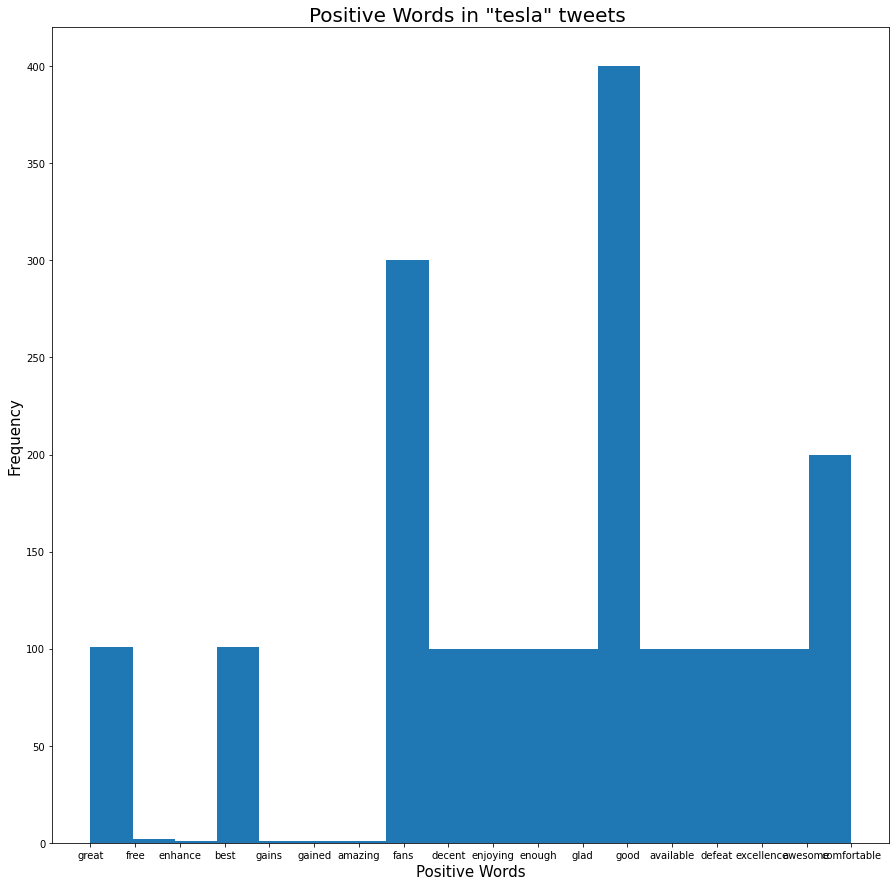

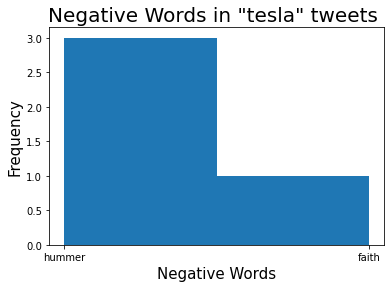

In [69]:
# Graph to display the good words
import matplotlib.pyplot as plt

b = plt.figure(figsize=(15,15)) # Declaring the figure size

#print(bwc,gwc,neutral)

#print(bwList)
# Counting the positive words and negative words 
bwListC= Counter(bwList)
gwListC = Counter(gwList)
for k,v in gwListC.items():
    
    print(k,v)

# plotting a histogram of the Positive words 
plt.hist(gwList, bins=(len(gwListC.values())))
plt.title("Positive Words in \"" + searchWord + "\" tweets ", size = 20)
plt.xlabel("Positive Words",size = 15)
plt.ylabel("Frequency",size = 15)
plt.show()

# plotting a histogram of the Negative words 

plt.hist(bwList, bins=(len(bwListC.values())))
plt.title("Negative Words in \"" + searchWord + "\" tweets ", size = 20)
plt.xlabel("Negative Words",size = 15)
plt.ylabel("Frequency",size = 15)
plt.show()